<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Codealong Exploring SVMs Using Sklearn

_Authors: Joseph Nelson (DC)_

---

In [1]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, linear_model, datasets
from sklearn.model_selection import cross_val_score

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 1. Load the handwritten digits dataset.

In [2]:
# A:
digits = datasets.load_digits()
digits.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [3]:
len(digits.data)

1797

In [4]:
#images are 8X8 pixeles (64 pixeles - little squares)
digits.data.shape

(1797, 64)

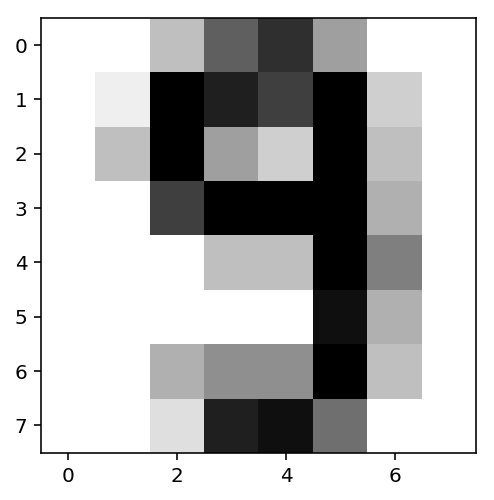

In [12]:
# the number 9
plt.imshow(digits.images[-5], cmap=plt.cm.gray_r, interpolation='nearest')

In [9]:
digits.target[-5]

9

In [13]:
digits.target[5]

5

In [14]:
digits_X, digits_y = digits.data, digits.target

In [15]:
digits_X.shape

(1797, 64)

### 2. Cross-validate a logistic regression on the data.

In [17]:
# A:
logistic = linear_model.LogisticRegression()
cross_val_score(logistic, digits_X, digits_y, cv=5, scoring='accuracy').mean()

0.92101881133607011

### 3. Cross-validate a SVM on the data.

In [18]:
# A:
clf = svm.SVC()
print(cross_val_score(clf, digits_X, digits_y, cv=5, scoring='accuracy').mean())

0.448786800616


In [19]:
clf = svm.SVC(kernel='linear')
print(cross_val_score(clf, digits_X, digits_y, cv=5, scoring='accuracy').mean())

0.949334872621


## Gaussian SVM has two parameters, gamma and C

---

### gamma

Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. 

The higher the value of gamma, the more it will try to exactly fit the training data set. Will cause over-fitting problem.
- small gamma: the model is constrained, can under-fit!  high bias and low variance.
- big gamma: Tries to capture the shape too well: can over-fit!  low bias and high variance.


### C

Penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly. C can be thought of as the parameter for the soft margin cost function, which controls the influence of each individual support vector

- small C: makes the decision surface smooth and simple, softer margin can under-fit! high bias and low variance.
- big C: selects more support vectors: can over-fit! harder margin. low bias and high variance.


### 4. Fit an SVM modifying the default gamma and C.

In [24]:
# A:
clf = svm.SVC(kernel='rbf', gamma=0.001, C=1)
cross_val_score(clf, digits_X, digits_y, cv=5, scoring='accuracy').mean()

0.9716361987950688

### 5. Gridsearch an optimal gamma with C=1.

In [35]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {'gamma': np.logspace(-5, 2, 20), 
              'C':[1]}

grid = GridSearchCV(clf, param_grid=parameters, cv=5, scoring='accuracy', verbose=1)
grid.fit(digits_X, digits_y)
grid.best_params_

s = cross_val_score(grid, digits_X, digits_y, cv=5, n_jobs=-1)
print("{} Score:\t{:0.3} ± {:0.3}".format("SVC", s.mean().round(3), s.std().round(3)))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   41.4s finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   35.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   35.1s finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   35.3s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   35.5s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   26.7s finished


SVC Score:	0.969 ± 0.017
CPU times: user 41.2 s, sys: 200 ms, total: 41.4 s
Wall time: 1min 43s


In [36]:
grid_mean_scores = grid.cv_results_['mean_test_score']
grid_mean_scores

array([ 0.8853645 ,  0.91652755,  0.93544797,  0.9476906 ,  0.95882026,
        0.96883695,  0.96994992,  0.93878687,  0.72287145,  0.27267668,
        0.11018364,  0.10350584,  0.10183639,  0.10183639,  0.11853088,
        0.10406233,  0.10239288,  0.10127991,  0.10127991,  0.10127991])

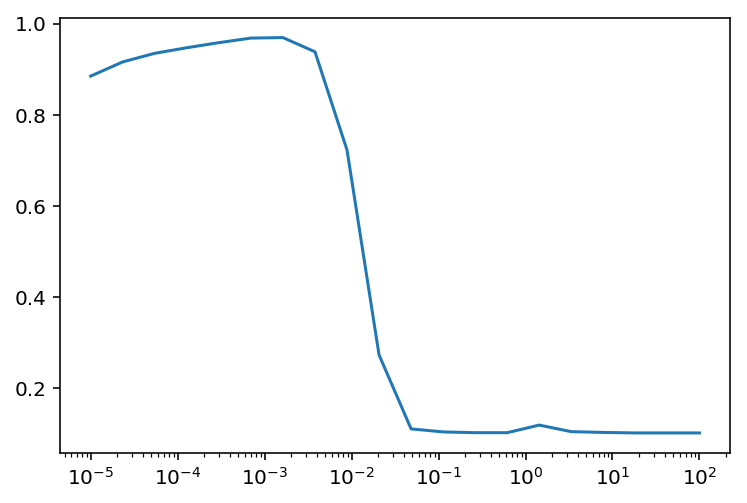

In [37]:
import matplotlib.pyplot as plt

plt.semilogx(np.logspace(-5, 2, 20), grid_mean_scores)

In [39]:
grid.best_params_, grid.best_score_

({'C': 1, 'gamma': 0.001623776739188721}, 0.96994991652754592)

### 6. [Bonus... because it's slow!] Gridsearch the optimal C, gamma, and kernel.

In [7]:
# A:

from sklearn.model_selection import GridSearchCV
clf = svm.SVC()

gamma_range = np.logspace(-5, 2, 10)
C_range = np.logspace(-3, 2, 10)
kernel_range = ['rbf', 'sigmoid', 'linear', 'poly']

param_grid = dict(gamma=gamma_range, C=C_range, kernel=kernel_range)

grid = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy', verbose=1)
grid.fit(digits_X, digits_y)

### 7. [Extra Practice] Import the iris dataset.

In [5]:
# import some data to play with
iris = datasets.load_iris()
iris_X = iris.data[:, :2]  # we only take the first two features. 
iris_y = iris.target

### 8. [Extra Practice] Cross-validate a default logistic regression and default SVM on the iris data.

In [9]:
# A:

### 9. [Extra Practice] Compare three SVMs with different kernels on the iris data visually.
- Gaussian
- Linear
- Poly of degree 3

In [10]:
# A:

### 10. [Bonus] Compare SVM kernels visually on fake data using sklearn's `make_circles`.

Load `make_circles` from here:
```python
from sklearn.datasets import make_circles
```

Compare the linear, rbf, and poly kernels.

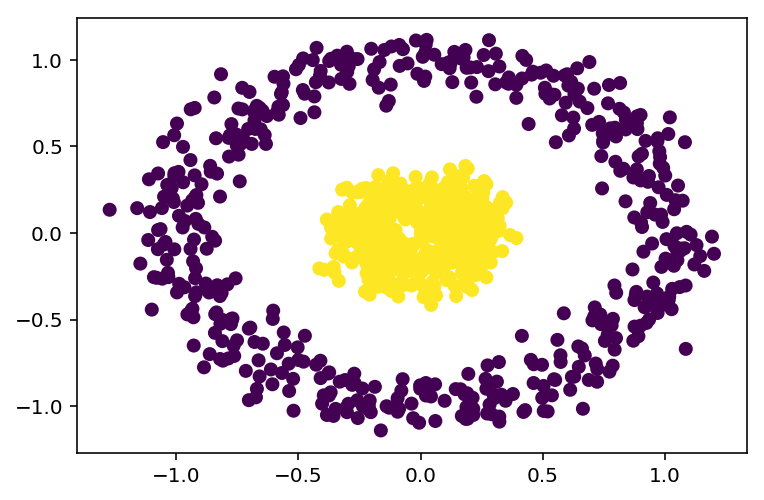

In [27]:
from sklearn.datasets import make_circles
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(circles_X[:,0], circles_X[:,1], c=circles_y)

Evaluate linear, polynomial (degree 3) and rbf kernels with default parameters.

In [28]:
# A:
svc = svm.SVC(kernel='linear')
print(cross_val_score(svc, circles_X, circles_y, 
                      cv=5, scoring='accuracy').mean())

poly_svc = svm.SVC(kernel='poly', degree=3)
print(cross_val_score(poly_svc, circles_X, circles_y, 
                      cv=5, scoring='accuracy').mean())

rbf_svc = svm.SVC(kernel='rbf')
print(cross_val_score(rbf_svc, circles_X, circles_y, 
                      cv=5, scoring='accuracy').mean())


0.652
0.567
1.0


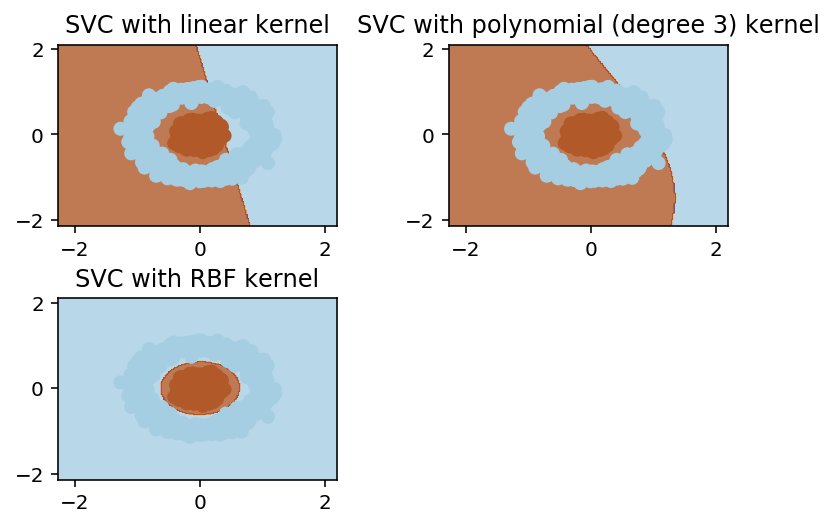

In [34]:
svc.fit(circles_X, circles_y)
poly_svc.fit(circles_X, circles_y)
rbf_svc.fit(circles_X, circles_y)


# create a mesh to plot in
x_min, x_max = circles_X[:, 0].min() - 1, circles_X[:, 0].max() + 1
y_min, y_max = circles_X[:, 1].min() - 1, circles_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with polynomial (degree 3) kernel',
          'SVC with RBF kernel']

for i, clf in enumerate((svc, poly_svc, rbf_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    
    # Plot also the training points
    plt.scatter(circles_X[:, 0], circles_X[:, 1], c=circles_y, cmap=plt.cm.Paired)
    plt.title(titles[i])
plt.show()